In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('humanoid_robot_navigation_dataset.csv')
print(f"Размер датасета: {df.shape}")
print(df.info())
df.head()
numer_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
categ_cols = [c for c in df.columns if df[c].dtype == 'O']
print("Числовые признаки:")
for i in range(0, len(numer_cols), 5):
    print("   ", numer_cols[i:i+5])
print("Категориальные признаки:")
for i in range(0, len(categ_cols), 5):
    print("   ", categ_cols[i:i+5])

Размер датасета: (1000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   episode_id                 1000 non-null   int64  
 1   environment_complexity     1000 non-null   object 
 2   num_robots                 1000 non-null   int64  
 3   num_tasks                  1000 non-null   int64  
 4   task_dependency_level      1000 non-null   object 
 5   obstacle_density           1000 non-null   float64
 6   initial_position           1000 non-null   object 
 7   target_position            1000 non-null   object 
 8   path_length                1000 non-null   float64
 9   collisions                 1000 non-null   int64  
 10  energy_consumption         1000 non-null   float64
 11  time_taken                 1000 non-null   float64
 12  task_completion_rate       1000 non-null   float64
 13  reward_score         

In [2]:
print(df.isnull().sum())
print(f"Количество дубликатов: {df.duplicated().sum()}")

episode_id                   0
environment_complexity       0
num_robots                   0
num_tasks                    0
task_dependency_level        0
obstacle_density             0
initial_position             0
target_position              0
path_length                  0
collisions                   0
energy_consumption           0
time_taken                   0
task_completion_rate         0
reward_score                 0
po_tsatd3_action             0
navigation_efficiency        0
scheduling_efficiency        0
overall_performance_score    0
dtype: int64
Количество дубликатов: 0


In [3]:
for col in categ_cols:
    print(df[col].nunique())
    print(df[col].value_counts())

3
environment_complexity
high      342
low       338
medium    320
Name: count, dtype: int64
3
task_dependency_level
interdependent    358
sequential        321
independent       321
Name: count, dtype: int64
829
initial_position
(40, 2)     4
(8, 44)     4
(2, 28)     3
(19, 31)    3
(46, 24)    3
           ..
(25, 29)    1
(38, 11)    1
(49, 24)    1
(49, 26)    1
(43, 42)    1
Name: count, Length: 829, dtype: int64
823
target_position
(99, 86)    3
(60, 58)    3
(60, 50)    3
(67, 88)    3
(78, 91)    3
           ..
(99, 50)    1
(85, 99)    1
(59, 56)    1
(63, 97)    1
(76, 78)    1
Name: count, Length: 823, dtype: int64
3
po_tsatd3_action
optimize_schedule       349
adjust_learning_rate    334
increase_exploration    317
Name: count, dtype: int64


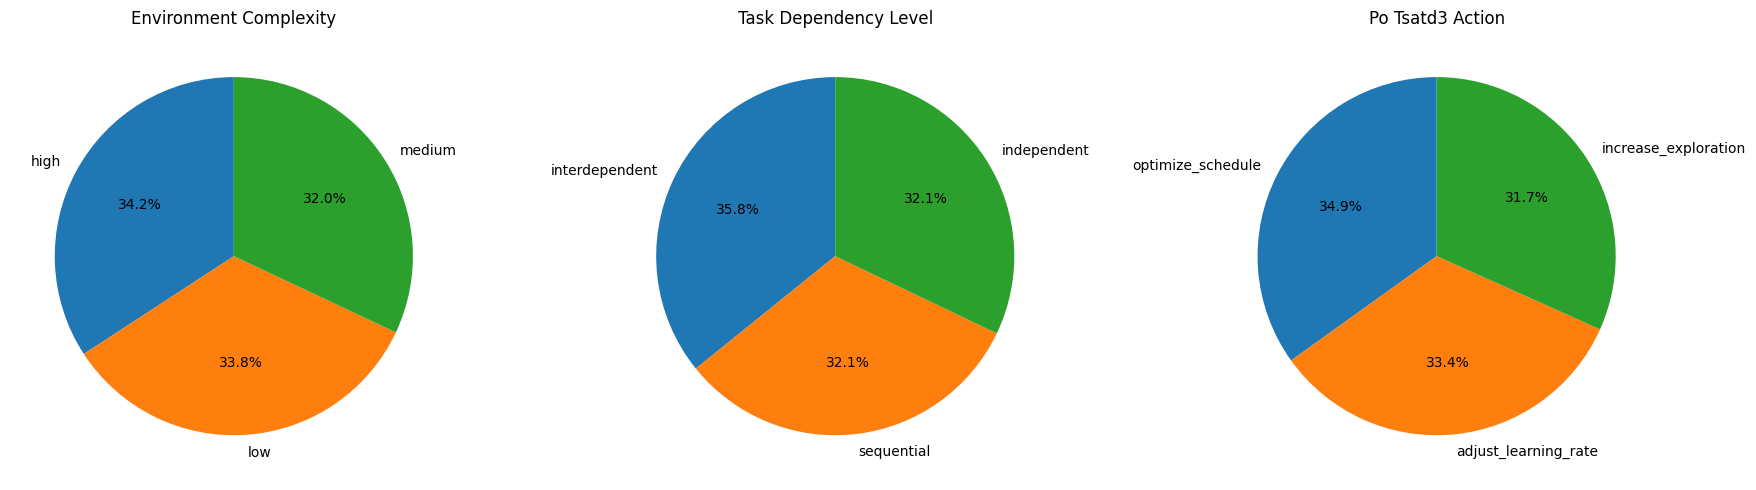

In [4]:
# Три категориальных признака для круговых диаграмм
cat_cols_for_pie = ['environment_complexity', 'task_dependency_level', 'po_tsatd3_action']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cat_cols_for_pie):
    value_counts = df[col].value_counts()
    axes[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


Признак: num_robots
Количество выбросов: 0

Признак: num_tasks
Количество выбросов: 0

Признак: obstacle_density
Количество выбросов: 0

Признак: path_length
Количество выбросов: 0

Признак: collisions
Количество выбросов: 0

Признак: energy_consumption
Количество выбросов: 0

Признак: time_taken
Количество выбросов: 0

Признак: task_completion_rate
Количество выбросов: 0

Признак: reward_score
Количество выбросов: 0

Признак: navigation_efficiency
Количество выбросов: 50

Признак: scheduling_efficiency
Количество выбросов: 0

Признак: overall_performance_score
Количество выбросов: 4


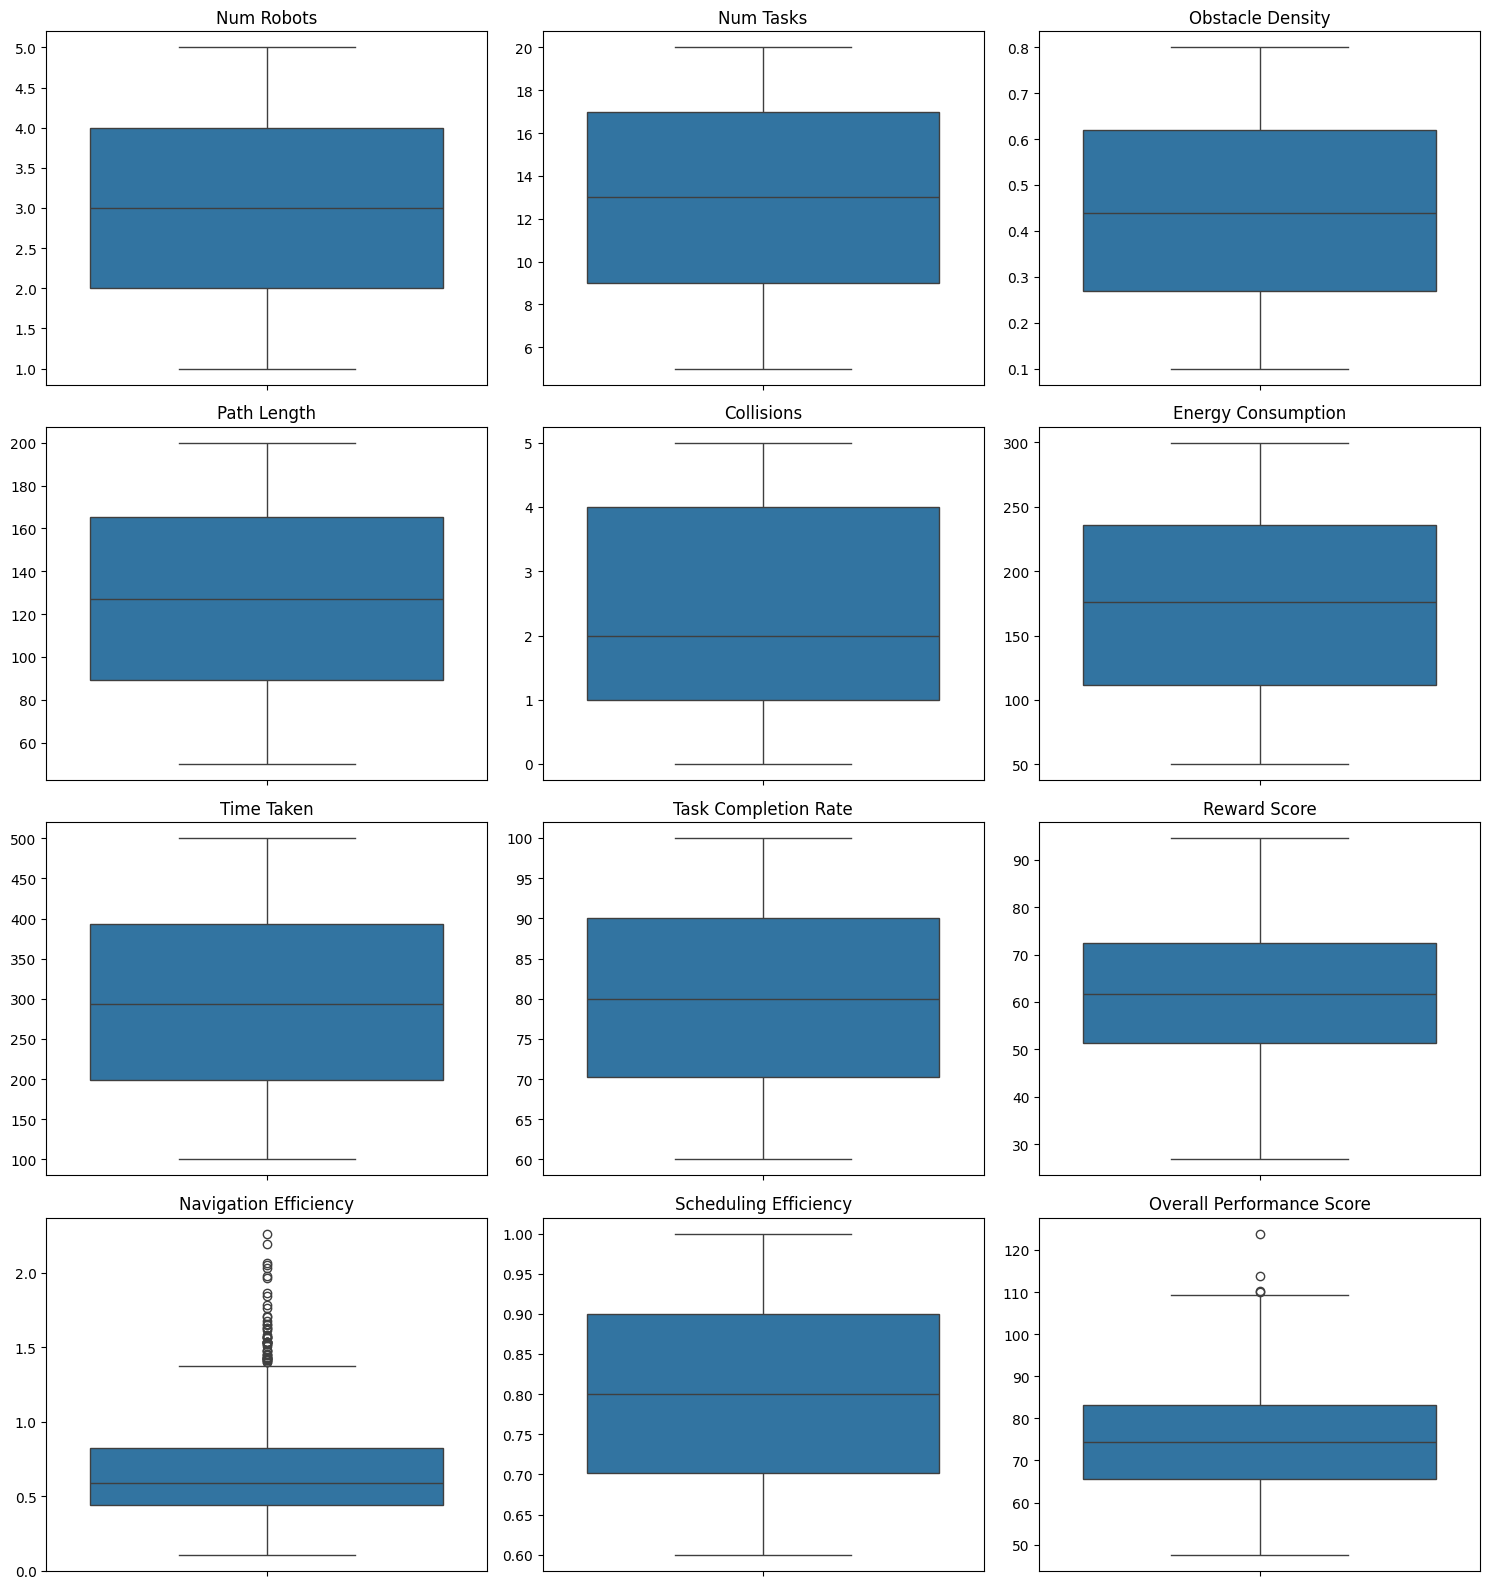

In [5]:

exclude_cols = ['episode_id']
numeric_cols = [col for col in numer_cols if col not in exclude_cols]


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\nПризнак: {col}")
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print("Количество выбросов:", len(outliers))


n = len(numeric_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

plt.figure(figsize=(5 * ncols, 4 * nrows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[col])
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [6]:
df_capped = df.copy()
numeric_cols = [c for c in df_capped.columns if pd.api.types.is_numeric_dtype(df_capped[c])]

exclude_cols = ['episode_id']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]


for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    n_lower = (df_capped[col] < lower_bound).sum()
    n_upper = (df_capped[col] > upper_bound).sum()

    if n_lower + n_upper > 0:
        print(f"{col}: заменено {n_lower + n_upper} значений "
              f"({n_lower} ниже {lower_bound:.2f}, {n_upper} выше {upper_bound:.2f})")

    # Заменяем выбросы на границы
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)


navigation_efficiency: заменено 50 значений (0 ниже -0.14, 50 выше 1.40)
overall_performance_score: заменено 4 значений (0 ниже 39.05, 4 выше 109.61)


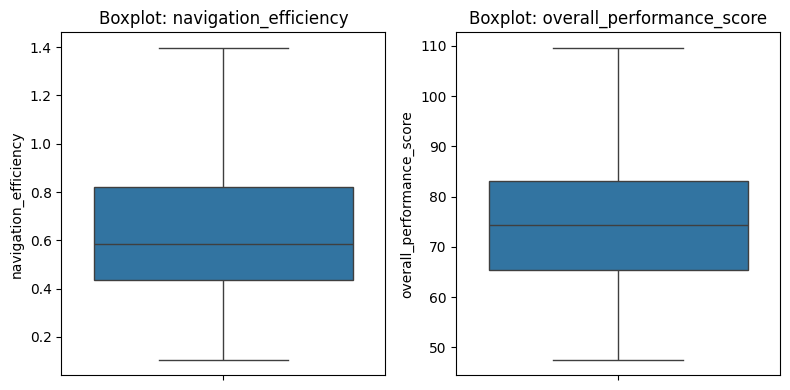

In [7]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_capped['navigation_efficiency'])
plt.title('Boxplot: navigation_efficiency')
plt.ylabel('navigation_efficiency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_capped['overall_performance_score'])
plt.title('Boxplot: overall_performance_score')
plt.ylabel('overall_performance_score')

plt.tight_layout()
plt.show()

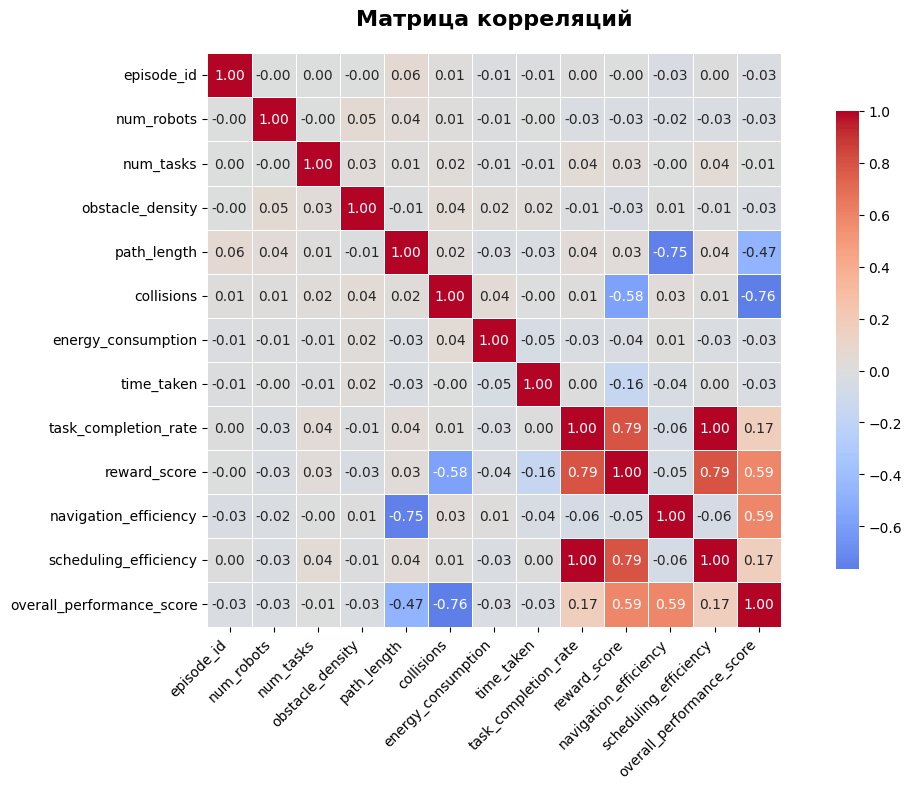

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numer_cols].corr()

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Матрица корреляций', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:

df_processed = df_capped.copy()

df_processed['initial_x'] = df_processed['initial_position'].str.extract(r'\((\d+),')[0].astype(int)
df_processed['initial_y'] = df_processed['initial_position'].str.extract(r',\s*(\d+)\)')[0].astype(int)

df_processed['target_x'] = df_processed['target_position'].str.extract(r'\((\d+),')[0].astype(int)
df_processed['target_y'] = df_processed['target_position'].str.extract(r',\s*(\d+)\)')[0].astype(int)

# Удалим исходные строковые столбцы позиций
df_processed = df_processed.drop(columns=['initial_position', 'target_position'])

# Определим категориальные столбцы
cat_cols = [c for c in df_processed.columns if df_processed[c].dtype == 'object']

# Применяем One-Hot Encoding
df_one_hot = pd.get_dummies(df_processed, columns=cat_cols, drop_first=True, dtype=int)

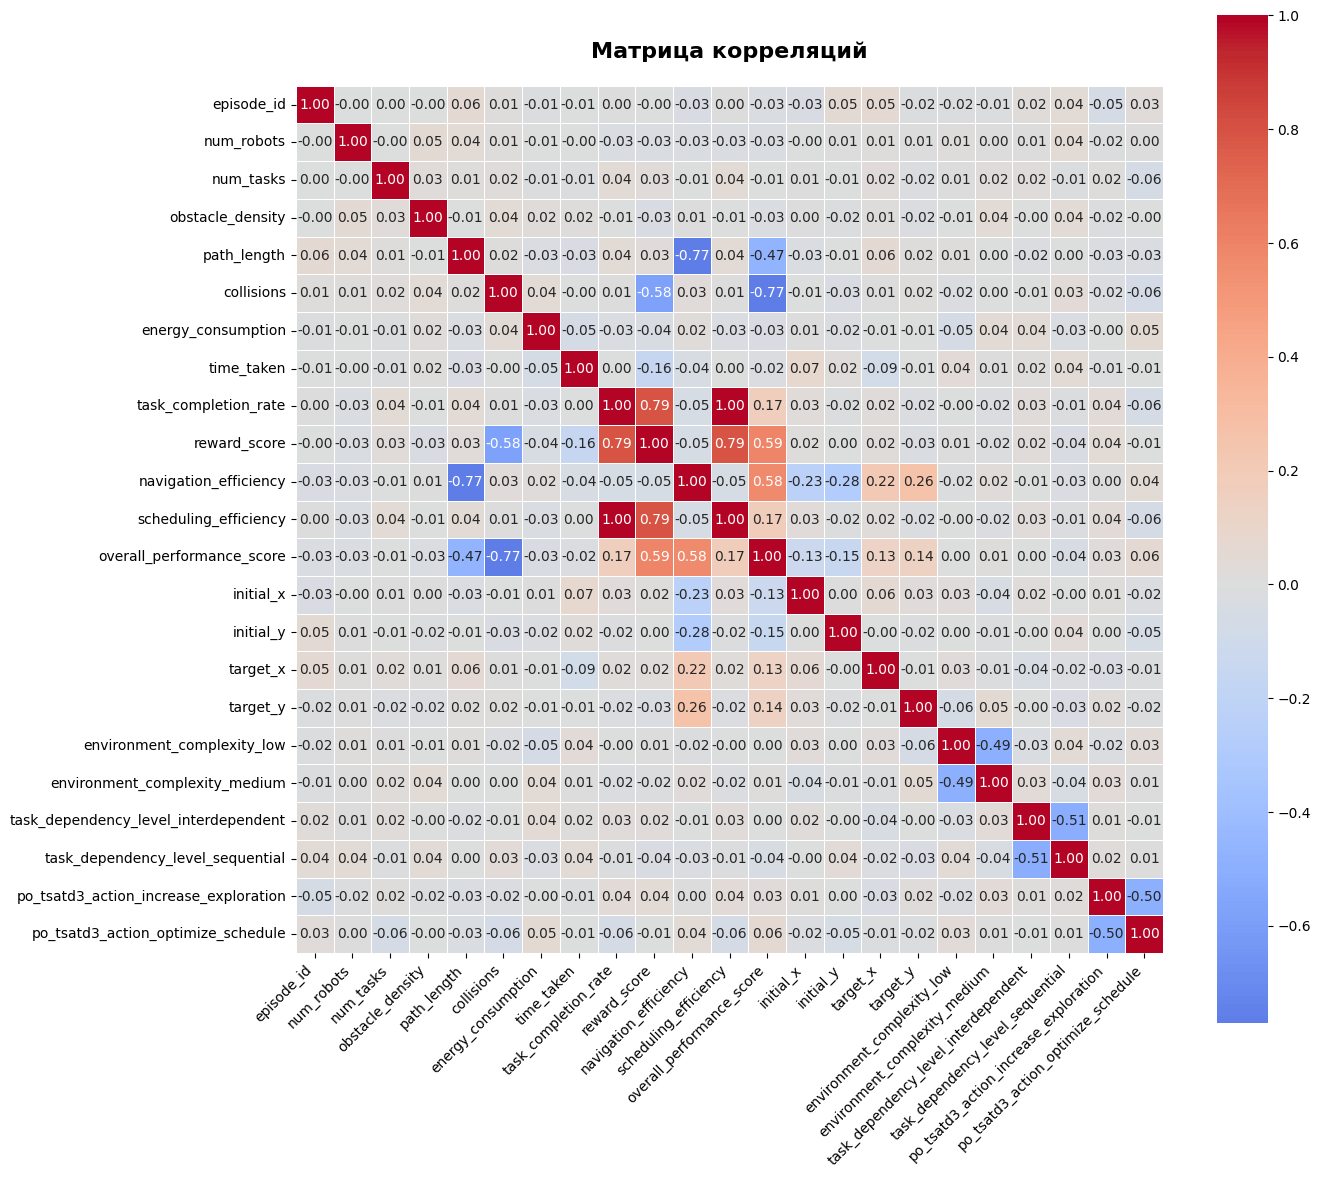

In [10]:
num_cols = [c for c in df_one_hot.columns if pd.api.types.is_numeric_dtype(df_one_hot[c])]

plt.figure(figsize=(14, 14))
corr_matrix = df_one_hot[num_cols].corr()

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Матрица корреляций', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Выделяем числовые признаки
numeric_cols = ['num_robots', 'num_tasks', 'obstacle_density', 'path_length',
                'collisions', 'energy_consumption', 'time_taken',
                'task_completion_rate', 'reward_score',
                'navigation_efficiency']

# Создаём копию
df_scaled = df_one_hot.copy()

# Применяем StandardScaler только к числовым столбцам
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [12]:
# Удаляем все слабокоррелированные признаки
df_scaled = df_scaled.drop(columns=[
    'episode_id',
    'initial_x',
    'initial_y',
    'target_x',
    'target_y',
    'scheduling_efficiency',  # Полная корреляция с task_completion_rate

    # Слабокоррелированные числовые признаки
    'num_robots',
    'num_tasks',
    'obstacle_density',
    'energy_consumption',
    'time_taken',
    'task_completion_rate',

    # Слабокоррелированные категориальные признаки
    'environment_complexity_low',
    'environment_complexity_medium',
    'task_dependency_level_interdependent',
    'task_dependency_level_sequential',
    'po_tsatd3_action_increase_exploration',
    'po_tsatd3_action_optimize_schedule'
])

In [13]:
print(f"Размер датасета: {df_scaled.shape}")
print(df_scaled.info())
df_scaled.head()

Размер датасета: (1000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   path_length                1000 non-null   float64
 1   collisions                 1000 non-null   float64
 2   reward_score               1000 non-null   float64
 3   navigation_efficiency      1000 non-null   float64
 4   overall_performance_score  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB
None


,path_length,collisions,reward_score,navigation_efficiency,overall_performance_score
0,-0.360746,-1.437532,0.842144,0.315273,90.20
1,-1.763913,0.320558,-1.656088,0.657974,72.80
2,1.209872,1.492619,-0.735103,-1.510497,48.87
3,1.259357,0.906589,0.850460,-1.457319,59.11
4,1.080648,1.492619,-0.931220,-0.780780,54.51


In [14]:
df_scaled.to_csv('cleaned_dataset.csv', index=False)